In [1]:
filename = 'Factors_ affecting_ university_student_grades_dataset.csv'

import os
if not os.path.isfile('datasets/archive.zip'):
    !wget -O datasets/archive.zip https://www.kaggle.com/api/v1/datasets/download/atifmasih/factors-affecting-university-student-grades
if not os.path.isfile('datasets/' + filename):
    !unzip datasets/archive.zip -d datasets/

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
raw_data = pd.read_csv("datasets/" + filename)

#

In [4]:
raw_data.head()

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,...,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
0,22.0,F,College,50000.0,A,81.0,Medium,8.0,Law,Private,...,Neutral,NaN,No,Visual,Yes,NaN,Low,2.0,NaN,B
1,21.0,M,NaN,60000.0,A,NaN,Medium,12.0,Law,Public,...,Negative,No,No,Auditory,Yes,Yes,Medium,5.0,High,NaN
2,19.0,M,College,75000.0,C,93.0,Medium,12.0,Law,Private,...,Neutral,No,Yes,NaN,No,No,Low,2.0,High,A
3,21.0,M,College,60000.0,A,86.0,Low,15.0,Business,Public,...,Neutral,No,NaN,Auditory,Yes,Yes,Low,3.0,Medium,C
4,19.0,NaN,NaN,40000.0,NaN,89.0,High,15.0,Medicine,NaN,...,Positive,No,No,Auditory,Yes,NaN,Medium,3.0,High,B


In [5]:
raw_data.shape

(10064, 35)

This dataset contains information about 10k students. There are 35 columns ranging from Age to the time spent on social media. Using the provided features, a model can be built to predict student grades. The problem is obviously a supervised learning problem because the labels are provided. The dataset was collection from public and private universities of Pakistan and it happens to contain null values in some places.

In [6]:
raw_data.columns

Index(['Age', 'Gender', 'Parental_Education', 'Family_Income',
       'Previous_Grades', 'Attendance', 'Class_Participation', 'Study_Hours',
       'Major', 'School_Type', 'Financial_Status', 'Parental_Involvement',
       'Educational_Resources', 'Motivation', 'Self_Esteem', 'Stress_Levels',
       'School_Environment', 'Professor_Quality', 'Class_Size',
       'Extracurricular_Activities', 'Sleep_Patterns', 'Nutrition',
       'Physical_Activity', 'Screen_Time', 'Educational_Tech_Use',
       'Peer_Group', 'Bullying', 'Study_Space', 'Learning_Style', 'Tutoring',
       'Mentoring', 'Lack_of_Interest', 'Time_Wasted_on_Social_Media',
       'Sports_Participation', 'Grades'],
      dtype='object')

Fearures Description

Age: The age of the student.\
Gender: The gender of the student (M for Male, F for Female).\
Parental_Education: The highest level of education attained by the student's parents.\
Family_Income: The family income level.\
Previous_Grades: The student's previous academic performance (A, B, or C grades).\
Attendance: The percentage of attendance in classes.\
Class_Participation: The level of participation in class activities (Low, Medium, or High).\
Study_Hours: The average number of study hours per week.\
Major: The student's major or field of study.\
School_Type: The type of University attended (Public or Private).\
Financial_Status: The financial status of the student (Low, Medium, or High).\
Parental_Involvement: The level of parental involvement in the student's education (Low, Medium, or High).\
Educational_Resources: Availability of educational resources at home (Yes or No).\
Motivation: The level of motivation towards studies (Low, Medium, or High).\
Self_Esteem: The level of self-esteem (Low, Medium, or High).\
Stress_Levels: The level of stress experienced by the student (Low, Medium, or High).\
School_Environment: Perception of the school environment (Negative, Neutral, or Positive).\
Professor_Quality: The quality of professors (Low, Medium, or High).\
Class_Size: The size of the class.\
Extracurricular_Activities: Participation in extracurricular activities (Yes or No).\
Sleep_Patterns: Average hours of sleep per day.\
Nutrition: The quality of nutrition (Unhealthy, Balanced, or Healthy).\
Physical_Activity: Level of physical activity (Low, Medium, or High).\
Screen_Time: Hours spent on screen-based activities per day.\
Educational_Tech_Use: Use of educational technology (Yes or No).\
Peer_Group: Perception of peer group influence (Negative, Neutral, or Positive).\
Bullying: Experience of bullying (Yes or No).\
Study_Space: Availability of a dedicated study space at home (Yes or No).\
Learning_Style: Preferred learning style (Visual, Auditory, or Kinesthetic).\
Tutoring: Participation in tutoring programs (Yes or No).\
Mentoring: Availability of mentoring support (Yes or No).\
Lack_of_Interest: Level of interest in academics (Low, Medium, or High).\
Time_Wasted_on_Social_Media: Time spent on social media platforms.\
Sports_Participation: Level of participation in sports activities (Low, Medium, or High).\
Grades: The final grades achieved by the student (A, B, or C).

In [7]:
NC = [
    "Age",
    "Attendance",
    "Study_Hours",
    "Class_Size",
    "Sleep_Patterns",
    "Screen_Time",
    "Time_Wasted_on_Social_Media",
    "Family_Income",
]  # Numerical Columns
CC = [
    "Gender",
    "School_Type",
    "Educational_Resources",
    "Extracurricular_Activities",
    "Educational_Tech_Use",
    "Bullying",
    "Study_Space",
    "Tutoring",
    "Mentoring",
    "Sports_Participation",
    "Major",
    "Peer_Group",
    "Learning_Style",
]  # Categorical Columns
OR = [
    "Parental_Education",
    "Previous_Grades",
    "Class_Participation",
    "Financial_Status",
    "Parental_Involvement",
    "Motivation",
    "Self_Esteem",
    "Stress_Levels",
    "Professor_Quality",
    "School_Environment",
    "Nutrition",
    "Physical_Activity",
    "Lack_of_Interest",
]  # Ordinal Columns
label = "Grades"

In [8]:
def plot_subplots(columns, plot_function, rows, cols, title, figsize=(15, 20)):
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    fig.suptitle(title, fontsize=16)
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        plot_function(raw_data, col, axes[i])
        axes[i].set_title(col)
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].tick_params(axis='y')
        
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def plot_numerical(data, col, ax):
    sns.histplot(data[col], kde=True, bins=15, ax=ax)

def plot_categorical(data, col, ax):
    sns.countplot(x=data[col], palette="viridis", ax=ax, hue = data[col], legend=False)

def plot_ordinal(data, col, ax):
    sns.boxplot(x=data[col], y=data[label], palette="pastel", ax=ax, hue = data[col], legend=False)

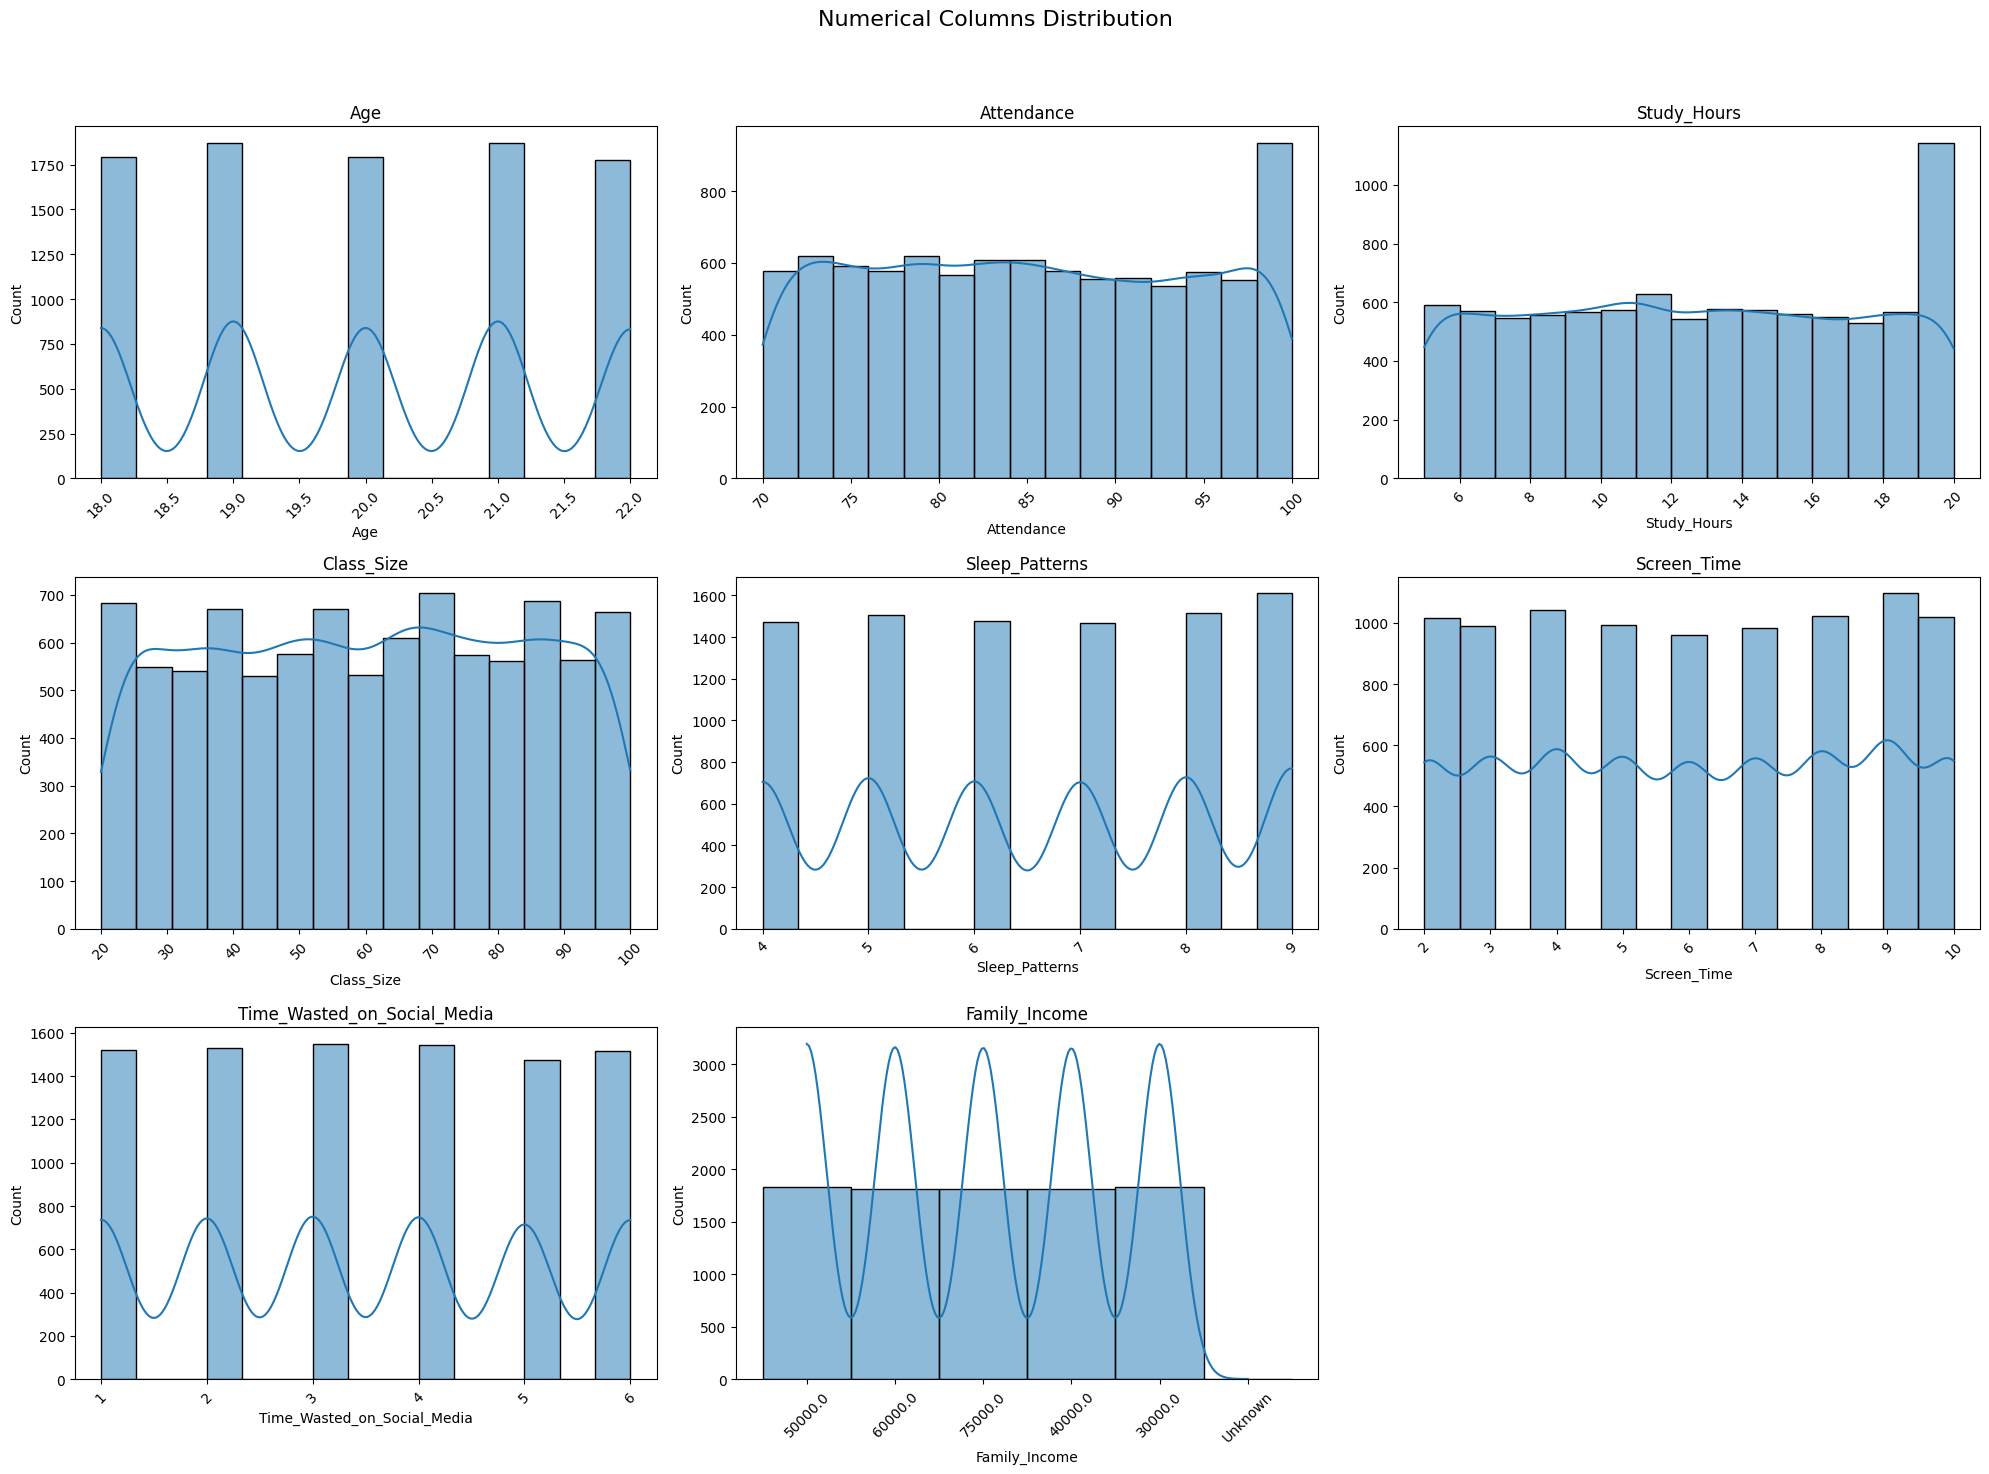

In [9]:
plot_subplots(NC, plot_numerical, rows=3, cols=3, title="Numerical Columns Distribution", figsize=(20, 15))

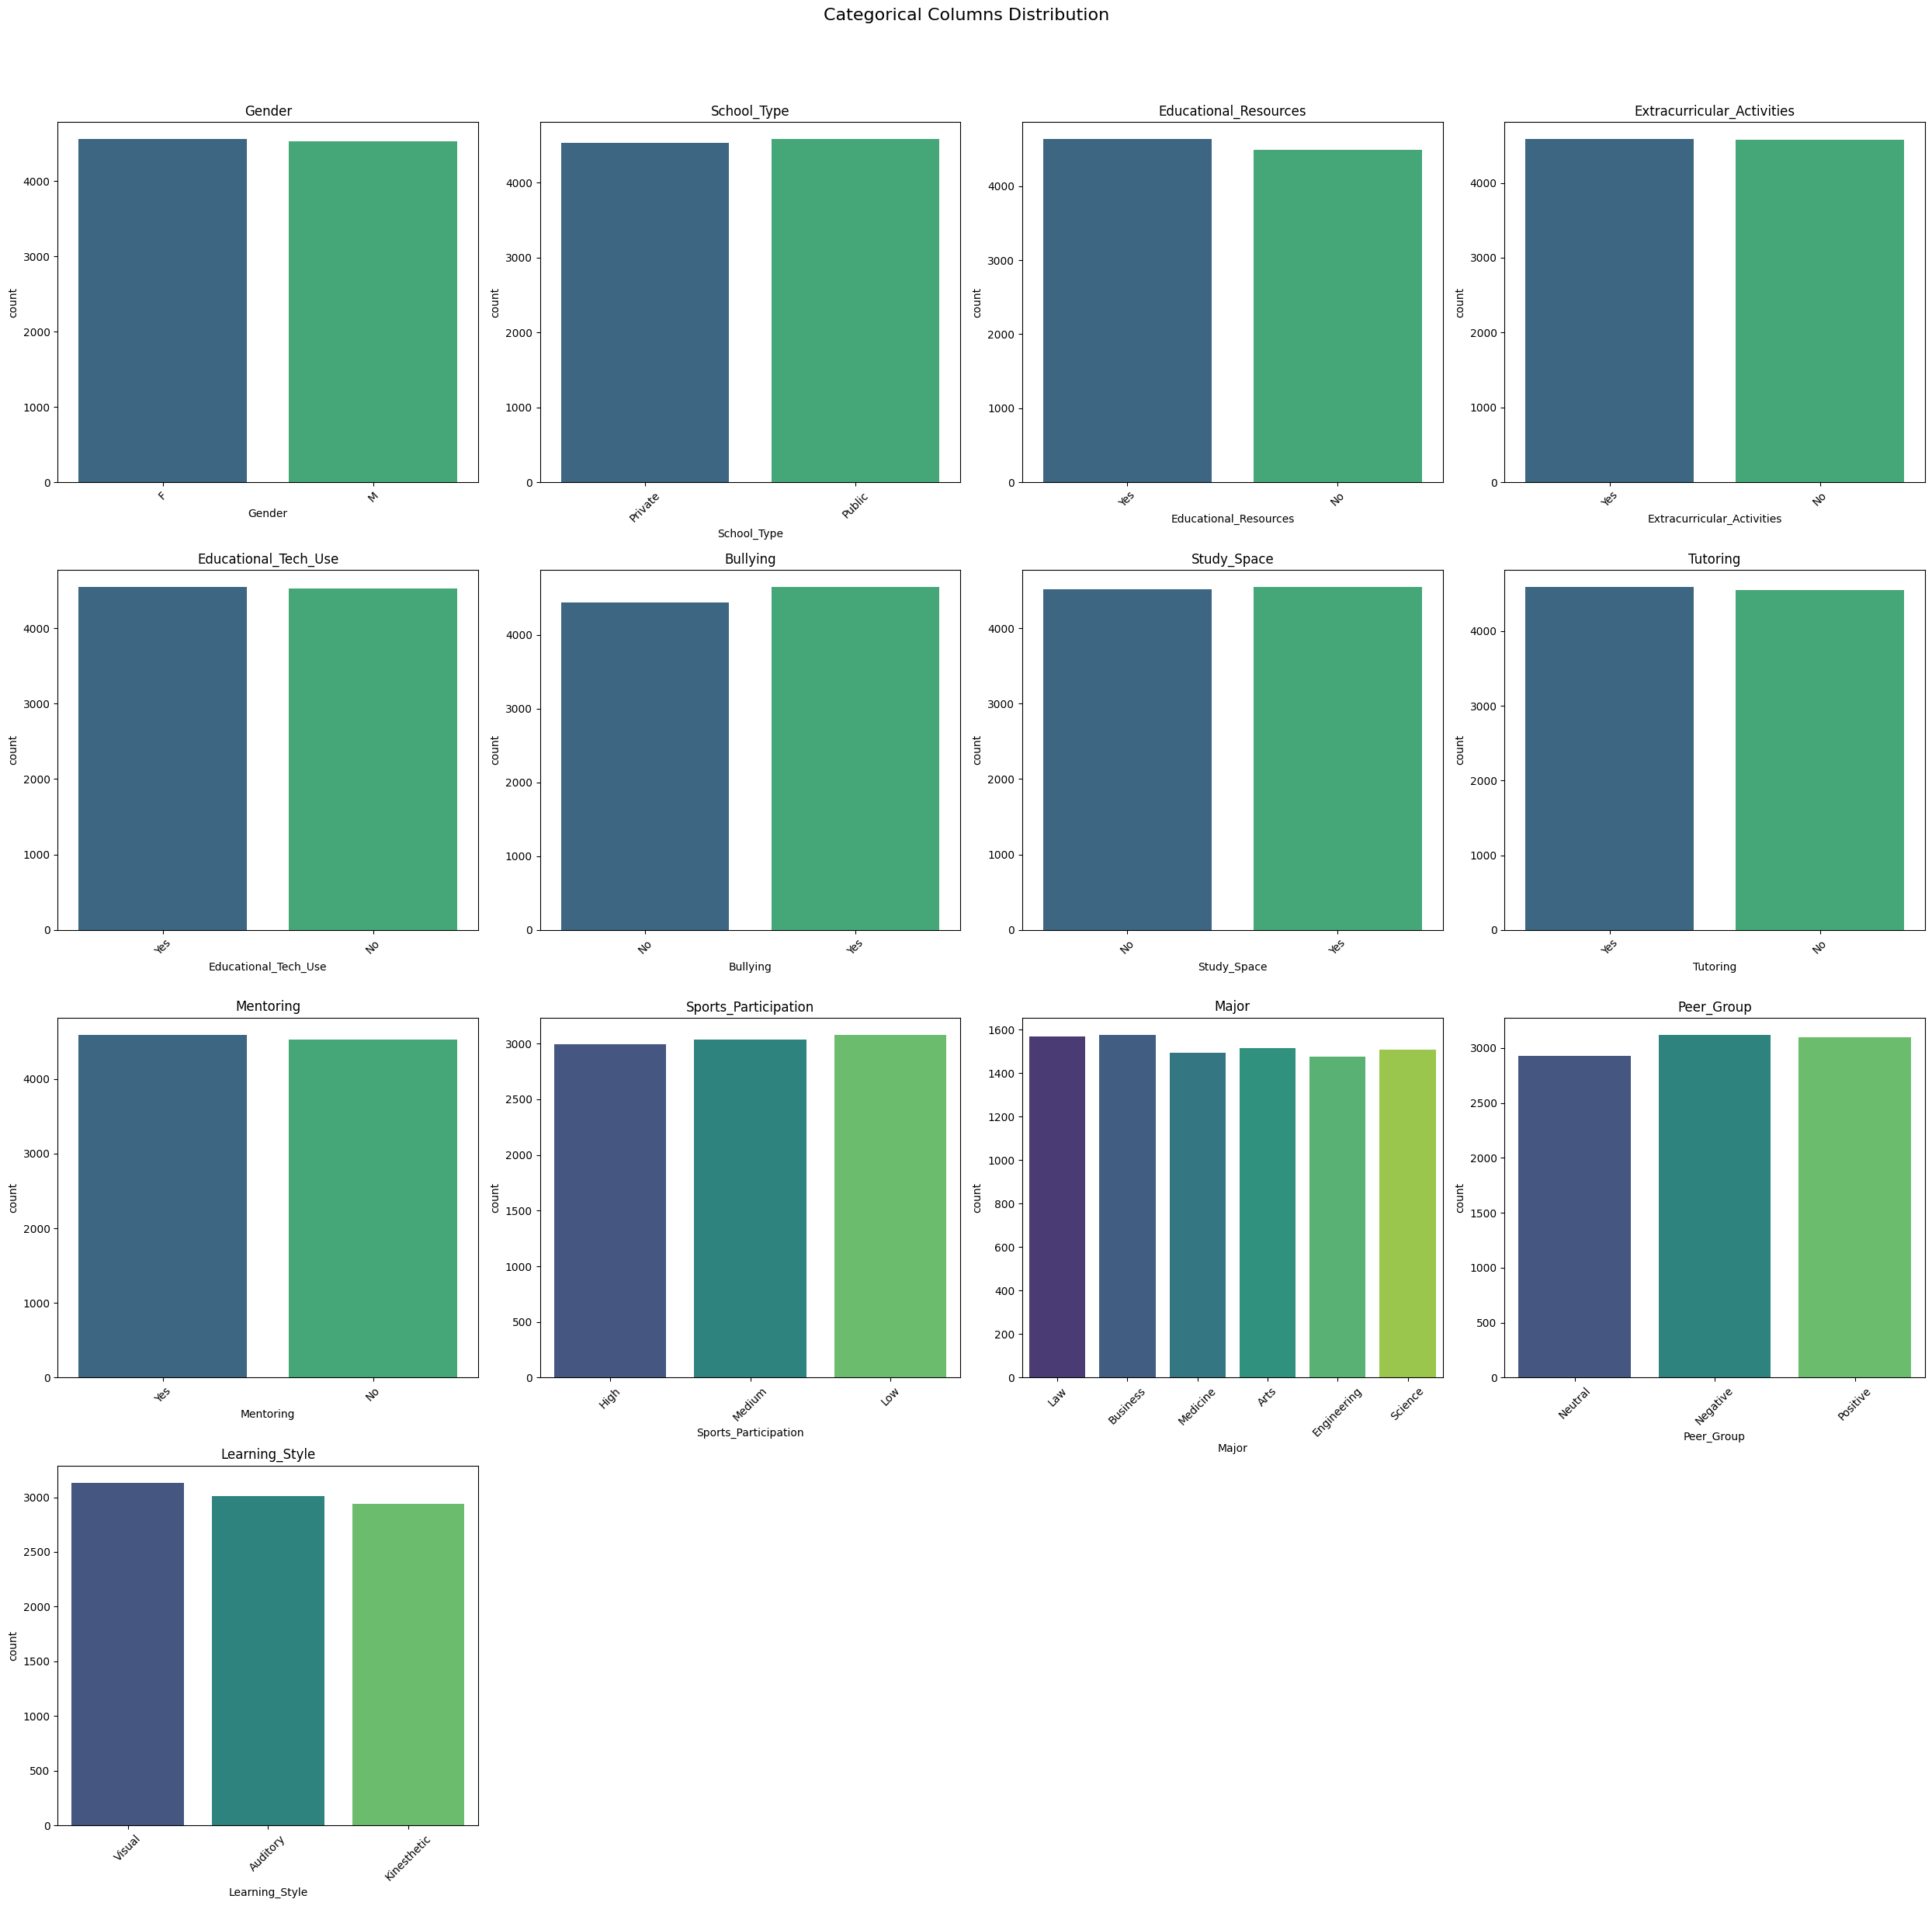

In [10]:
plot_subplots(CC, plot_categorical, rows=4, cols=4, title="Categorical Columns Distribution", figsize=(25, 25))

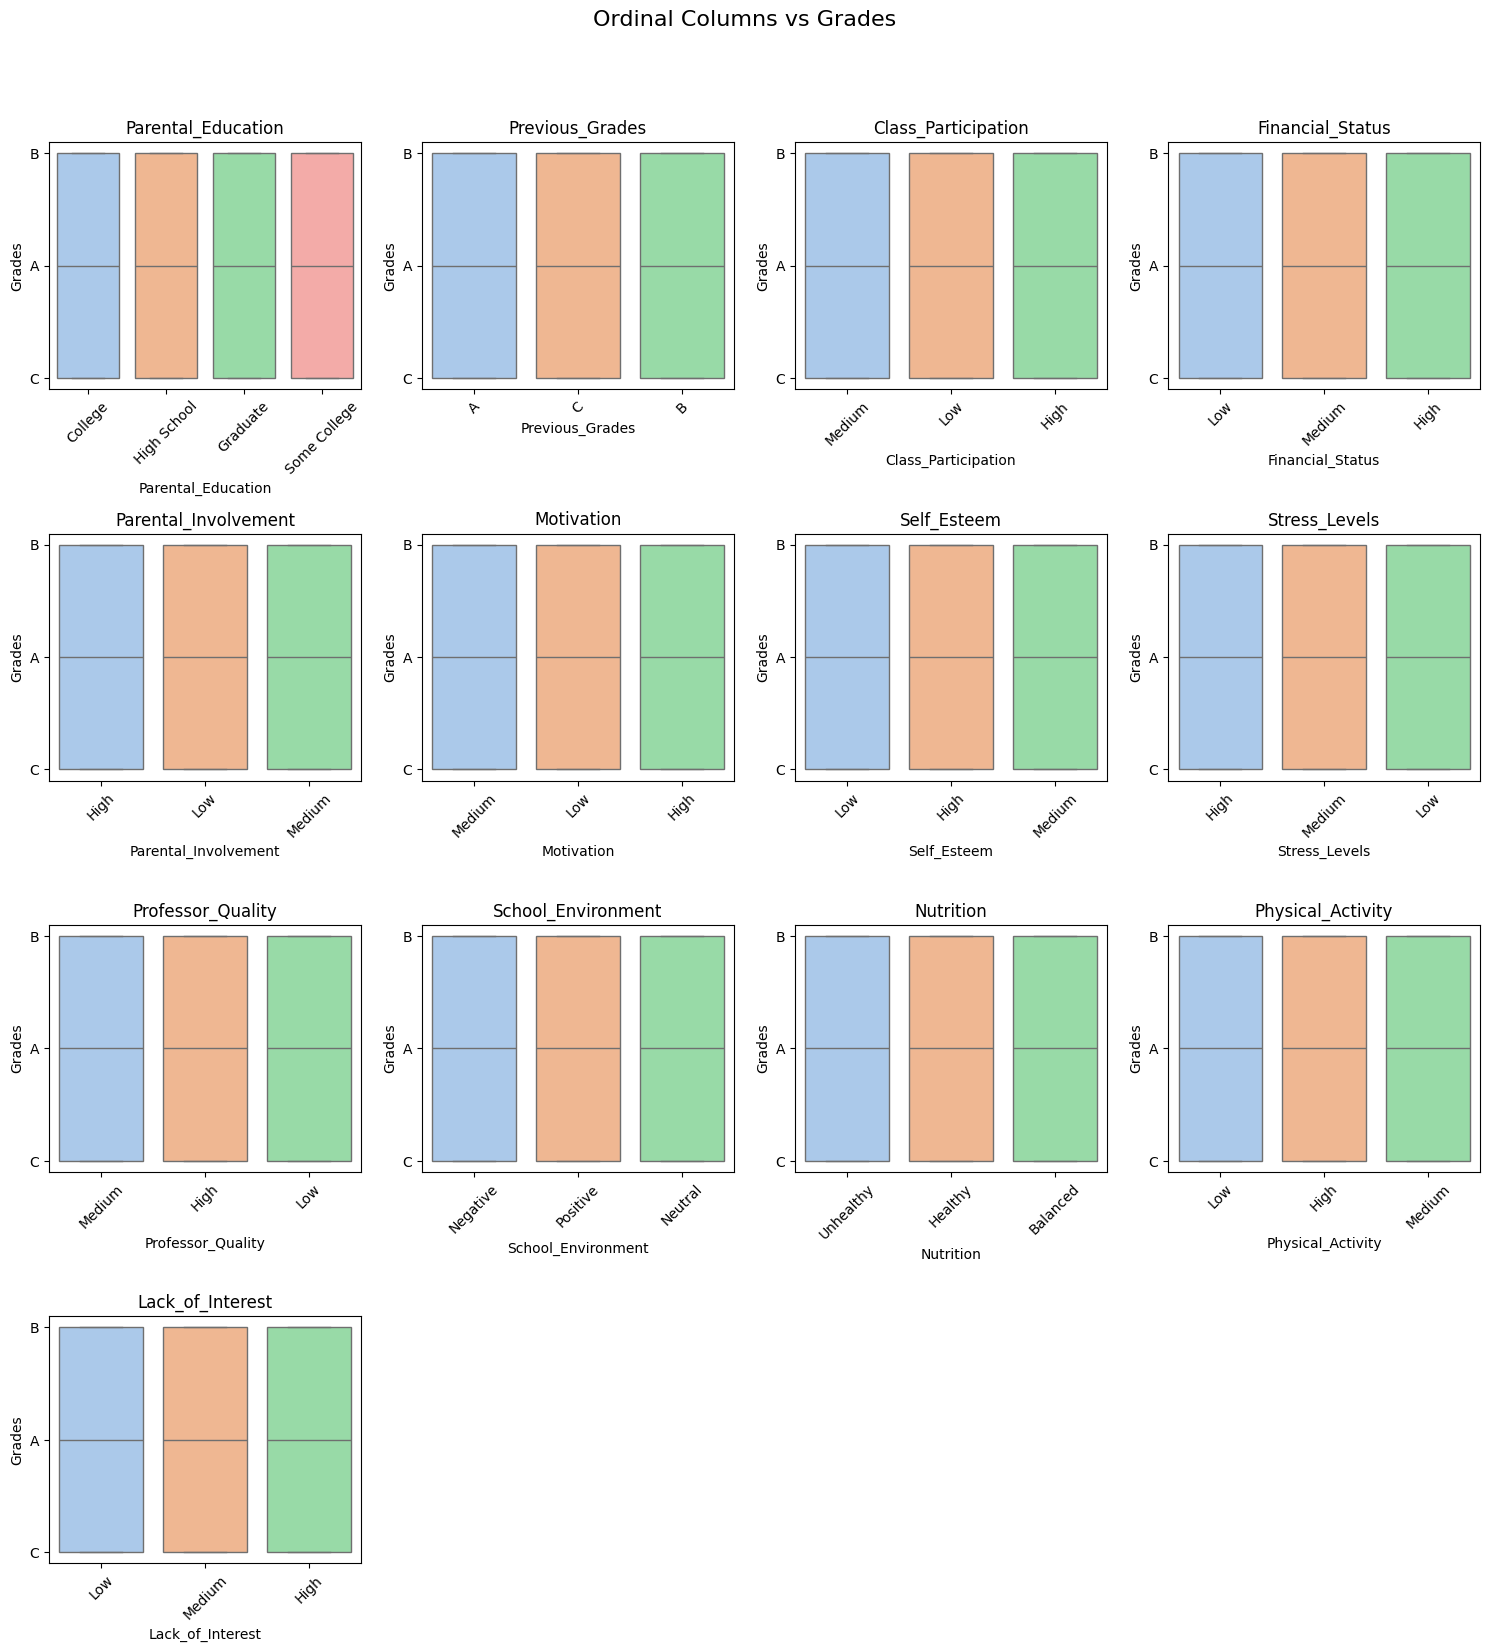

In [11]:
plot_subplots(OR, plot_ordinal, rows=5, cols=4, title="Ordinal Columns vs Grades")

In [12]:
# Deleting entries that have Unknown grades
print("Raw data length: ", len(raw_data))
df = raw_data[raw_data[label].notna()]
print("After filtering: ", len(df))

Raw data length:  10064
After filtering:  9024


In [13]:
# # Deleting rows that have too many unknown values
df = df.drop(df[df.isna().sum(axis=1) > 5].index)
print('Entries deleted', len(raw_data) - len(df))

Entries deleted 1942


In [20]:
# Replacing "Unknown" with NaN in Family_Income columns
df['Family_Income'] = df['Family_Income'].replace("Unknown", np.nan)
df['Family_Income'] = pd.to_numeric(df['Family_Income'], errors = 'coerce')

In [15]:
# Gender, Educational_Tech_Use, Bullying, Study_Space, Learning_Style, Tutoring, Mentoring
# Approach 1: Don't use them at all
# Approach 2.1: Create a model to predict a value for each one based on other (modified) columns
# Approach 2.2: Create a model to predict a value for each one on unmodified columns 
# Approach 3: Substitue None values with Unknown

## Approach 1
Don't use them at all

In [16]:
for i, v in enumerate(raw_data.columns):
    print(i, v, raw_data[v].unique())

0 Age [22. 21. 19. 20. nan 18.]
1 Gender ['F' 'M' nan]
2 Parental_Education ['College' nan 'High School' 'Graduate' 'Some College']
3 Family_Income ['50000.0' '60000.0' '75000.0' '40000.0' nan '30000.0' 'Unknown']
4 Previous_Grades ['A' 'C' nan 'B']
5 Attendance [ 81.  nan  93.  86.  89.  82.  84.  75.  73.  98.  72.  79.  94.  70.
  96.  71.  80.  91.  99.  77.  74.  92.  97.  78.  76.  95.  85.  90.
  87.  83.  88. 100.]
6 Class_Participation ['Medium' 'Low' 'High' nan]
7 Study_Hours [ 8. 12. 15. 14. 13.  5. 10.  6.  9. 20. 18. nan 19. 16. 11.  7. 17.]
8 Major ['Law' 'Business' 'Medicine' 'Arts' 'Engineering' 'Science' nan]
9 School_Type ['Private' 'Public' nan]
10 Financial_Status ['Low' 'Medium' 'High' nan]
11 Parental_Involvement ['High' 'Low' 'Medium' nan]
12 Educational_Resources ['Yes' 'No' nan]
13 Motivation ['Medium' nan 'Low' 'High']
14 Self_Esteem ['Low' 'High' 'Medium' nan]
15 Stress_Levels ['High' nan 'Medium' 'Low']
16 School_Environment ['Negative' 'Positive' 'Neutral' 

In [25]:
ComplexOR = ['Parental_Education', 'Previous_Grades', 'School_Environment', 'Nutrition']
SimpleOR = [item for item in OR if item not in ComplexOR]
for i in SimpleOR:
    print(i, end = " -> ")
    print(df[i].unique())
print("-"*10)
for i in ComplexOR:
    print(i, end = " -> ")
    print(df[i].unique())

Class_Participation -> ['Medium' 'Low' 'High' nan]
Financial_Status -> ['Low' 'Medium' 'High' nan]
Parental_Involvement -> ['High' 'Medium' 'Low' nan]
Motivation -> ['Medium' 'Low' 'High' nan]
Self_Esteem -> ['Low' 'Medium' 'High' nan]
Stress_Levels -> ['High' 'Medium' 'Low' nan]
Professor_Quality -> ['Medium' 'High' 'Low' nan]
Physical_Activity -> ['Low' 'High' 'Medium' nan]
Lack_of_Interest -> ['Low' 'High' 'Medium' nan]
----------
Parental_Education -> ['College' 'High School' 'Graduate' nan 'Some College']
Previous_Grades -> ['A' 'C' nan 'B']
School_Environment -> ['Negative' 'Positive' 'Neutral' nan]
Nutrition -> ['Unhealthy' nan 'Balanced' 'Healthy']
